# Titanic: Machine Learning from Disaster

**The sinking of the Titanic is one of the most infamous shipwrecks in history.**

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this notebook,I build a predictive model that answers the question: “what sorts of people were more likely to survive?”, using passenger data such as name, age, gender, socio-economic class, etc.

## Overview
* Import Libraries
* Understanding the Data
    * Missing values
    * Feature distributions
* Data Cleaning and Exploration
    * Missing data: impute or remove
    * Correlations: amongst features and with survivability
* Feature Engineering
    * 

## Import libraries
---

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualisation and plotting tools
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./data/test.csv
./data/train.csv


## Understanding the Data
---
First, import the datasets for training and testing. 

In [208]:
train_df = pd.read_csv('./data/train.csv')#'/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('./data/test.csv')#'/kaggle/input/titanic/test.csv')

Let's take a quick look at both dataframes to identify the data types, and check for any missing data.

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing values
**Training data**
* Age - 177 / 891 
* Cabin - 687 / 891 
* Embarked - 2 / 891 

**Testing data**
* Age - 86 / 418 
* Cabin - 327 / 418 
* Fare - 1 / 418 

### Feature distributions

In [6]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The distributions of properties in the training and testing sets are well matched. Initially, we can see that;
* the overall likelihood for survival is 38.4%.
* the majority of passengers travelled in 2nd or 3rd class, and were younger than 30 years old. 
* The range of Fares is broad and its distribution is centered toward the lower values. 

After we finish exploring the data and before training our model, we will want to scale each feature to bring them within a similar range of values.

To get a better feel for the population, let's visualise these distributions, including the categorical features. 

Some features, specifically Name, Cabin, Ticket, and PassengerId are going to need to processing before we can determine whether there is any useful information that can be extracted from them.


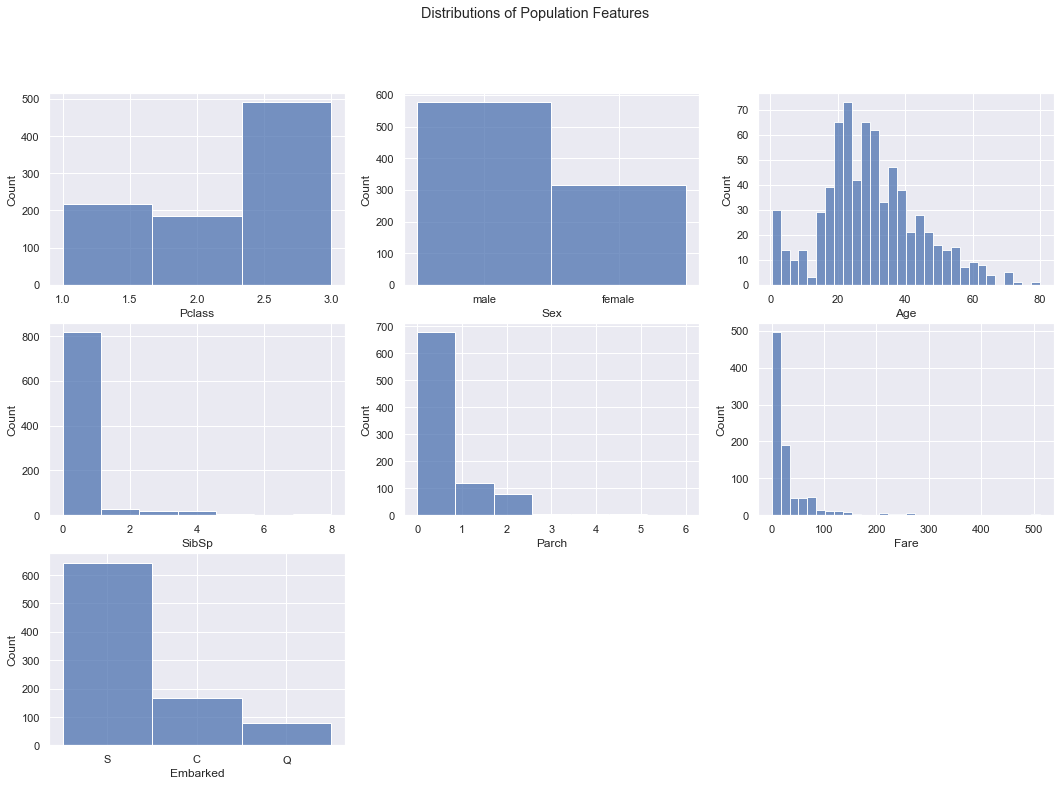

In [8]:
nc, nr = 3, 3
fig, axes = plt.subplots(ncols = nc, nrows = nr, figsize=(18, 12))
fig.suptitle('Distributions of Population Features')
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']#,'PassengerId','Cabin', 'Survived','Name','Ticket'
 
for ax, feature in zip(axes.flatten(), features):
    bins = min(len(train_df[feature].unique()), 30)
    sns.histplot(train_df[train_df[feature].notna()][feature], bins = bins, ax = ax)

fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])

* A little more than half of all passengers travelled in third class, with the other half split between first and second class.
* Approximately 2/3 of passengers were male.
* The majority of passengers were aged between their late teens and late 30's.
* The majority of passengers embarked at Southampton (S).
* Most passengers travelled without family.
* The distribution of fares is heavily positively skewed, most passengers paid a minimum fare.
# ??
For logistic regression, asymmetric distrbutions are not an issue

Before moving on, let's consider the other four features.

In [9]:
train_df[train_df.Cabin.notna()][['PassengerId','Ticket','Name','Cabin']].head(10)

,PassengerId,Ticket,Name,Cabin
1,2,PC 17599,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C85
3,4,113803,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",C123
6,7,17463,"McCarthy, Mr. Timothy J",E46
10,11,PP 9549,"Sandstrom, Miss. Marguerite Rut",G6
11,12,113783,"Bonnell, Miss. Elizabeth",C103
21,22,248698,"Beesley, Mr. Lawrence",D56
23,24,113788,"Sloper, Mr. William Thompson",A6
27,28,19950,"Fortune, Mr. Charles Alexander",C23 C25 C27
31,32,PC 17569,"Spencer, Mrs. William Augustus (Marie Eugenie)",B78
52,53,PC 17572,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",D33


We see that 
* PassengerId is unlikely to be useful, seems to be just a unique ID for each passenger.
* Some tickets are numeric, others have a letter prefix.
* The names include the persons title, which may be useful if it indicates information beyond sex and age (i.e. doctors or military personnel).
* Cabins include a letter prefix (this indicates deck), and some passengers are assigned multiple cabins.

Fraction PassengerID unique:  1.0
Fraction Ticket unique:   0.6139169472502806
Fraction Ticket numeric:  0.7418630751964085


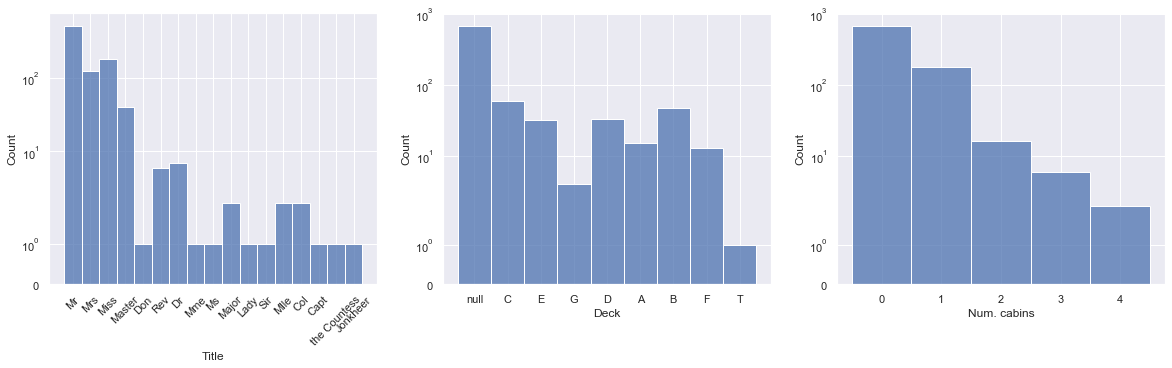

In [10]:
print('Fraction PassengerID unique: ', train_df.PassengerId.nunique() / len(train_df))
print('Fraction Ticket unique:  ', train_df.Ticket.apply(lambda x: True if len(train_df[train_df.Ticket == x]) == 1 else False).sum() / len(train_df))
print('Fraction Ticket numeric: ', len(train_df[train_df.Ticket.str.isnumeric()]) / len(train_df))

fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (20,5))
sns.histplot(train_df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip()), discrete = True, ax = ax[0])
sns.histplot(train_df.Cabin.apply(lambda x: x[0] if pd.notna(x) else 'null'), discrete = True, ax = ax[1])
sns.histplot(train_df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' '))), discrete = True, ax = ax[2])
ax[0].tick_params(labelrotation = 45, axis = 'x')
ax[0].set_xlabel('Title')
ax[1].set_xlabel('Deck')
ax[2].set_xlabel('Num. cabins')
ax[0].set_yscale('symlog')
ax[1].set_yscale('symlog')
ax[2].set_yscale('symlog')

We see that
* All passengers are assigned a unique PassengerId, so this feature will not be useful
* Approx. 40% of passengers share a ticket identifier
* Approx 75% of passengers have a non-numeric ticket identifier.
* Most passengers have title "Mr", "Mrs", "Miss", or "Master". This information might already be contained in Sex, Age, and SibSp. It might be interesting to investigate titles such as "Dr" or "Major", but < 10 passengers have these titles
* Decks are identified by letters A-G. One passenger has deck "T", which we should check. 
* Most passengers are assigned 0 or 1 cabins, though some have up to 4.

We will use this information to do some early feature engineering. We will
* Create "Cabin_letter" and "Num_cabins" features, and drop the Cabin feature.
* Create a "Title" feature, and drop the Name feature
* Create "Ticket_unique" and "Ticket_numeric" features, and drop the Ticket feature


In [11]:
# Which passenger has deck assignment "T"?
train_df[train_df.Cabin.notna() & (train_df.Cabin.str[0] == 'T')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S


In [12]:
# Does he share a ticket with anybody?
train_df[train_df.Ticket == "113784"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S


In [209]:
# Drop this passenger as an outlier.
train_df.drop([339], inplace = True)

In [210]:
train_df['Ticket_unique'] = train_df.Ticket.apply(lambda x: True if len(train_df[train_df.Ticket == x]) == 1 else False)
train_df['Ticket_numeric'] = train_df.Ticket.apply(lambda x: True if x.isnumeric() else False)
# Group into common titles. Unusual titles can all be grouped as "Other"
common_titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
train_df['Title'] = train_df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip() if x.split(',')[1].split('.')[0].strip() in common_titles else "Other")
# Group by cabin letter (deck). If multiple cabins are assigned, use the first. If Cabin is null, set "U" for "Unknown"
train_df['Cabin_letter'] = train_df.Cabin.apply(lambda x: x[0] if pd.notna(x) else 'U')
train_df['Num_cabins'] = train_df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train_df.drop(columns = ['Name','Cabin','Ticket'], inplace = True)

## Data Cleaning and Exploration
---

### Missing data: impute or remove

Let's deal with the missing values for Age, Embarked, and Fare, as we have already replaced the missing Cabin values.

First check whether there is any notable differences between the groups of passengers with and without their Age recorded.

In [15]:
df1 = train_df[train_df.Age.isna()].describe().loc[['mean','std']].rename(index = {'mean':'mean_isna', 'std':'std_isna'})
df2 = train_df[train_df.Age.notna()].describe().loc[['mean','std']].rename(index = {'mean':'mean_notna', 'std':'std_notna'})
pd.concat((df1,df2))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Num_cabins
mean_isna,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,0.112994
std_isna,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608,0.334903
mean_notna,448.734923,0.406732,2.238429,29.677658,0.513324,0.431978,34.693384,0.304348
std_notna,259.269449,0.491569,0.837555,14.525365,0.930238,0.853735,52.956070,0.581741


On average, passengers without a recorded Age are less likely to survive, pay a lower Fare, and stay in lower classes. 

This indicates that the Age values are missing at random (MAR), i.e., not correlated with the passengers Age, but perhaps with their Pclass or other features. 

We might consider imputing the missing Age values based on the distribution of the Age of other passengers. Given the correlation of missing Age value and e.g., Pclass, we
should check whether the distribution of passengers ages vary amongst subpopulations. 
Let's check distributions grouped by Pclass and Sex.

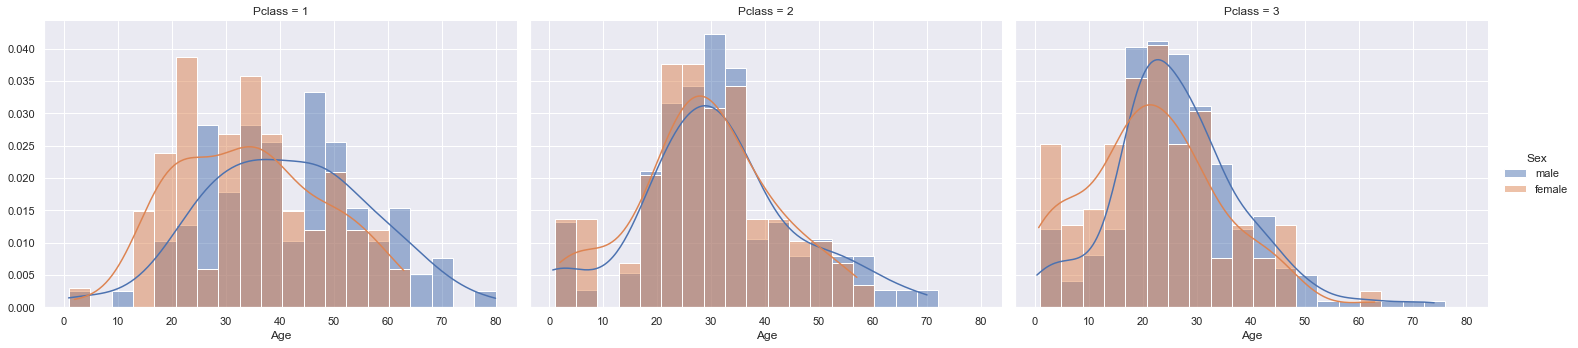

In [16]:
g = sns.FacetGrid(train_df, col = 'Pclass', hue = 'Sex', height = 5, aspect = 1.4)
g.map_dataframe(sns.histplot, 'Age', kde = True, stat = 'density', alpha = 0.5, bins = 20, binrange = (1,80))
g.add_legend()

We see that
* In each Pclass, the distribution of Age amongst females is centered toward younger values compared to males, particularly in Pclass = 1. 
* The distribution of Age in Pclass = 2, 3 are similar, with a slightly younger mean in Pclass = 3.
* The only demographic with a distribution of Age significantly different from the others is males in Pclass = 1.


Rather than dropping the Age column, we will impute the missing values based on their Pclass and Sex.

So, for missing values we will;

drop the entries with null values for Embarked and Fare, as they are very few.
fill the null Age values with random numbers drawn from the distribution of Ages amongst entries with matching Pclass and Sex.

In [211]:
import random
# drop entries with missing embarked value
train_df = train_df[train_df.Embarked.notna()]
###test_df = test_df[test_df.Fare.notna()]

# fill null Age values with random numbers drawn from existing distributions
groups = [(s,p) for s in train_df.Sex.unique() for p in train_df.Pclass.unique()]
rand_age = []
for s,p in groups:
    n_null = len(train_df[train_df.Age.isna() & (train_df.Sex == s) & (train_df.Pclass == p)])
    rand_age += random.choices(train_df[train_df.Age.notna() & (train_df.Sex == s) & (train_df.Pclass == p)].Age.astype(int).to_list(), k = n_null)
# fill null values for Age
train_df.loc[pd.isna(train_df.Age), 'Age'] = rand_age

### Correlations: amongst features and with survivability

In [18]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Ticket_unique', 'Ticket_numeric', 'Title',
       'Cabin_letter', 'Num_cabins'],
      dtype='object')

Text(0.5, 0.98, '')

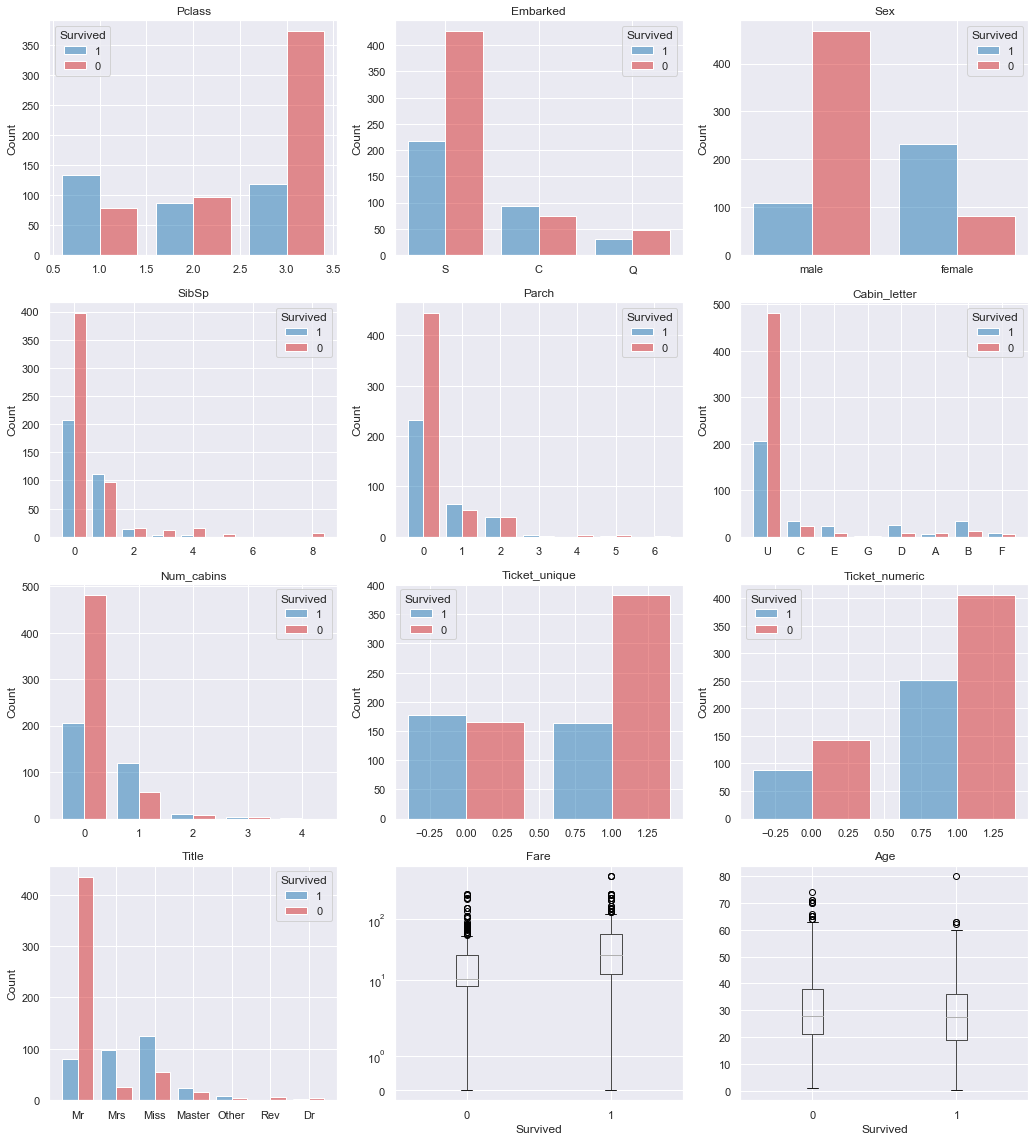

In [19]:
fig, axes = plt.subplots(ncols = 3, nrows = 4, figsize = (17,20))
pal = {0: 'tab:red', 1: 'tab:blue'}

features = ['Pclass','Embarked','Sex','SibSp','Parch','Cabin_letter','Num_cabins','Ticket_unique','Ticket_numeric','Title']
for ax, feature in zip(axes.flatten(), features):
    d = train_df.groupby([feature,'Survived'])['Fare'].count().unstack()
    bp = sns.histplot(train_df, x = feature, hue = 'Survived', hue_order = [1,0], palette = pal, alpha = 0.5, multiple = 'dodge', discrete = True, shrink = 0.8, ax = ax)
    bp.set_title(feature)
    bp.set_xlabel(None)
    #xticks = bp.get_xticks()
    ## Print survival rate on plot
    #for i,r in enumerate(d.iterrows()):
    #    surv = r[1][1]
    #    die = r[1][0]
    #    bp.text(xticks[i], 10, round(surv/(surv+die),2), ha = 'center', weight = 'bold', rotation = 30)

for i, feature in enumerate(['Fare','Age']):
    train_df.boxplot(ax = axes[3,i+1], column=feature,by='Survived')

axes[3,1].set_yscale('symlog')

fig.suptitle(None)

We see that most features now divide the passengers into groups with different survival rates, and will be useful predictors.

The exception is Ticket_numeric, which has no correlation with survivability.

For our final steps before model training, we will
* check whether any features are redundant (i.e. strongly correlated with one or more other features)
* bin the continuous features (Fare and Age) into discrete groups

We can check the correlations between categorical variables using the PyCorr package, which implements the Cramer's V methodology to calculate correlation strengths between between variables (basically a modified Chi-squared statistic, ranging from 0 to 1, with 1 being maximum correlation). 


Text(0.5, 0.98, "Cramer's V correlation matrix")

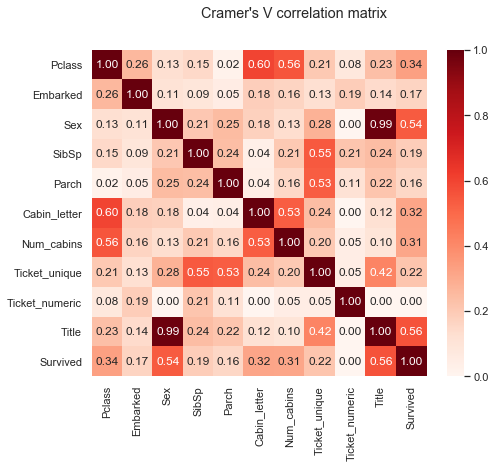

In [212]:
from pycorrcat.pycorrcat import plot_corr, corr_matrix
fig, ax = plt.subplots(figsize = (7.5,6))
features = ['Pclass','Embarked','Sex','SibSp','Parch','Cabin_letter','Num_cabins','Ticket_unique','Ticket_numeric','Title','Survived']
correlation_matrix = corr_matrix(train_df, features)
sns.heatmap(correlation_matrix, annot = True, fmt = '1.2f', cmap = 'Reds', vmin = 0, vmax = 1, ax = ax)
fig.suptitle("Cramer's V correlation matrix")


## Feature Engineering

For Age and Fare, precise information about the exact value for each passenger is unlikely to be a good predictor of survivability, we can instead bin the entries by sensible ranges of values.

Let's check how the age distributions of passengers with different survival outcomes compare. We'll also separate by sex.

* The age distributions between the two groups of passengers are somewhat similar, though 
* younger male passengers were typically ***more*** likely to survive than males aged > 15 y.o., whereas
* younger female passengers were typically ***less*** likely to survive than females aged > 15 y.o.

21-25    166
26-30    131
16-20    117
31-35    108
41-50    102
36-40     83
>50       73
0-5       60
6-10      25
11-15     23
Name: Age, dtype: int64


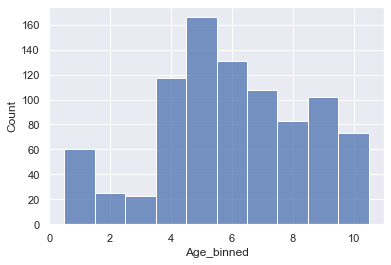

In [21]:
cut_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30','31-35','36-40','41-50','>50']
cut_bins = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 100])
print(pd.cut(train_df.Age, bins = cut_bins, labels = cut_labels, include_lowest = True).value_counts())
train_df.loc[:,'Age_binned'] = train_df.Age.apply(lambda x : (x <= cut_bins).argmax())
sns.histplot(train_df, x = 'Age_binned', discrete = True)

7.5-10    249
26-35     136
10-15     122
51-100    105
16-25      99
1-7.5      72
>100       53
36-50      37
0          15
Name: Fare, dtype: int64


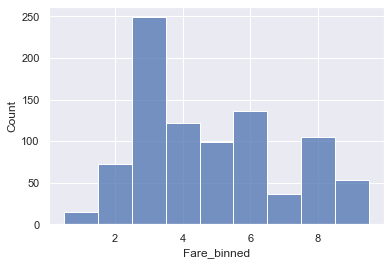

In [22]:
cut_labels = ['0', '1-7.5','7.5-10', '10-15', '16-25','26-35','36-50','51-100','>100']
cut_bins = np.array([-2, 0, 7.5, 10, 15, 25, 35, 50, 100, 1000])
print(pd.cut(train_df.Fare, bins = cut_bins, labels = cut_labels).value_counts())
train_df.loc[:,'Fare_binned'] = train_df.Fare.apply(lambda x : (x <= cut_bins).argmax())
sns.histplot(train_df, x = 'Fare_binned', discrete = True)

# Clean data function
We'll keep track of our cleaning/engineering steps in a single function so that we can start fresh before training the model

In [258]:
import random

def clean_data(df):
    ## Embarked ##
    df = df[df.Embarked.notna()]
    
    ## Ticket ##
    df['Ticket_unique'] = df.Ticket.apply(lambda x: True if len(df[df.Ticket == x]) == 1 else False)
    df['Ticket_numeric'] = df.Ticket.apply(lambda x: True if x.isnumeric() else False)

    ## Name ##
    # Most common titles
    titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs']
    df['Title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip() if x.split(',')[1].split('.')[0].strip() in titles else "Other")

    ## Cabin ##
    # Number of Cabins assigned
    df['Num_cabins'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
    df['Cabin_letter'] = df.Cabin.apply(lambda x: x[0] if pd.notna(x) else 'U')
    df = df[df.Cabin_letter != 'T']

    ## Age ##
    # fill null Age values with random numbers drawn from existing distributions 
    groups = [(s,p) for s in df.Sex.unique() for p in df.Pclass.unique()]
    rand_age = []
    for s,p in groups:
        n_null = len(df[df.Age.isna() & (df.Sex == s) & (df.Pclass == p)])
        rand_age += random.choices(df[df.Age.notna() & (df.Sex == s) & (df.Pclass == p)].Age.astype(int).to_list(), k = n_null)
    # fill null values for Age
    df.loc[pd.isna(df.Age), 'Age'] = rand_age
    # bin ages
    #age_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30','31-35','36-40','41-50','>50']
    #age_bins = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 100])
    #df.loc[:,'Age'] = df.Age.apply(lambda x : (x <= age_bins).argmax())
    df.loc[:,'Age'] = pd.qcut(df.Age, q = 20)    

    ## Fare ##
    df = df[df.Fare.notna()]
    # Bin the fares into sensible ranges
    #fare_labels = ['0', '1-7.5','7.5-10', '10-15', '16-25','26-35','36-50','51-100','>100']
    #fare_bins = np.array([-2, 0, 7.5, 10, 15, 25, 35, 50, 100, 1000])
    #df.loc[:,'Fare'] = df.Fare.apply(lambda x : (x <= fare_bins).argmax())   
    df.loc[:,'Fare'] = pd.qcut(df.Fare, q = 15)     

    ## Parch / SibSp ##
    df['Group_size'] = df['Parch'] + df['SibSp']
    df.drop(columns = ['Parch','SibSp'], inplace = True)
    
    drop_cols = ['Cabin','Name','Ticket','PassengerId','Ticket_numeric'] + ['Age','Cabin_letter','Num_cabins','Embarked','Group_size']#,'Fare','Ticket_unique']
    df.drop(columns = drop_cols, inplace = True)

    return df

train_df = pd.read_csv('./data/train.csv')#'/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('./data/test.csv')#'/kaggle/input/titanic/test.csv')

train_df.loc[:,'train'] = 1
test_df.loc[:,'train'] = 0
test_df.loc[:,'Survived'] = np.nan
df = pd.concat((train_df,test_df), ignore_index = True)
df = clean_data(df)
df.head()

In [260]:
from sklearn.preprocessing import OneHotEncoder
# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore", sparse = False)
encoder.fit(df[df.train == 1].drop(['train'], axis = 1))    # Assume for simplicity all features are categorical.

# Apply the encoder.
X_train = encoder.transform(df[df.train == 1].drop(['train'], axis = 1))
encoder.categories_

,Survived,Pclass,Sex,Fare,train,Ticket_unique,Title
0,0.0,3,male,"(7.229, 7.75]",1,True,Mr
1,1.0,1,female,"(63.577, 93.5]",1,False,Mrs
2,1.0,3,female,"(7.854, 7.925]",1,True,Miss
3,1.0,1,female,"(40.416, 63.577]",1,False,Mrs
4,0.0,3,male,"(7.925, 8.662]",1,True,Mr


In [126]:
# Model training

[array([0., 1.]),
 array(['1', '2', '3'], dtype=object),
 array(['female', 'male'], dtype=object),
 array([Interval(-0.001, 7.229, closed='right'),
        Interval(7.229, 7.75, closed='right'),
        Interval(7.75, 7.854, closed='right'),
        Interval(7.854, 7.925, closed='right'),
        Interval(7.925, 8.662, closed='right'),
        Interval(8.662, 10.5, closed='right'),
        Interval(10.5, 13.0, closed='right'),
        Interval(13.0, 15.5, closed='right'),
        Interval(15.5, 21.075, closed='right'),
        Interval(21.075, 26.0, closed='right'),
        Interval(26.0, 29.7, closed='right'),
        Interval(29.7, 40.416, closed='right'),
        Interval(40.416, 63.577, closed='right'),
        Interval(63.577, 93.5, closed='right'),
        Interval(93.5, 512.329, closed='right')], dtype=object),
 array(['C', 'Q', 'S'], dtype=object),
 array([False,  True]),
 array([False,  True]),
 array(['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Other'], dtype=object),
 array([0, 1,

In [261]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
#test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
train_df = pd.read_csv('./data/train.csv')#'/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('./data/test.csv')#'/kaggle/input/titanic/test.csv')

train_df.loc[:,'train'] = 1
test_df.loc[:,'train'] = 0
test_df.loc[:,'Survived'] = np.nan
df = pd.concat((train_df,test_df), ignore_index = True)
df = clean_data(df)

# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore", sparse = False)
encoder.fit(df[df.train == 1].drop(['Survived','train'], axis = 1))    # Assume for simplicity all features are categorical.

# Apply the encoder.
X_train = encoder.transform(df[df.train == 1].drop(['Survived','train'], axis = 1))
#X_test

y_train = df[df.train==1].Survived

gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.63483146 0.76404494 0.75280899 0.76271186 0.75706215]
0.7342918809115724
[0.76966292 0.81460674 0.78089888 0.76836158 0.79661017]
0.7860280581476544
[0.84269663 0.80337079 0.82022472 0.79096045 0.83615819]
0.8186821557798515


# To Do
Model tuning